In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y=housing.target
print(y)


[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
X=df

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
ss=StandardScaler()
ss.fit(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(7,activation='relu',input_shape=(8,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 63        
                                                                 
 dense_4 (Dense)             (None, 20)                160       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 244 (976.00 Byte)
Trainable params: 244 (976.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [ ]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=10,verbose=1)

Epoch 1/10
407/407 [==============================] - 2s 2ms/step - loss: 1.4674 - mae: 0.8490 - val_loss: 0.7682 - val_mae: 0.6491
Epoch 2/10
407/407 [==============================] - 1s 2ms/step - loss: 0.7881 - mae: 0.6395 - val_loss: 0.6276 - val_mae: 0.5898
Epoch 3/10
407/407 [==============================] - 1s 2ms/step - loss: 0.6359 - mae: 0.5872 - val_loss: 0.5262 - val_mae: 0.5429
Epoch 4/10
407/407 [==============================] - 1s 2ms/step - loss: 0.5208 - mae: 0.5318 - val_loss: 0.4244 - val_mae: 0.4898
Epoch 5/10
407/407 [==============================] - 1s 2ms/step - loss: 0.4432 - mae: 0.4833 - val_loss: 0.3668 - val_mae: 0.4408
Epoch 6/10
407/407 [==============================] - 1s 2ms/step - loss: 0.4093 - mae: 0.4602 - val_loss: 0.3446 - val_mae: 0.4287
Epoch 7/10
407/407 [==============================] - 1s 2ms/step - loss: 0.3931 - mae: 0.4501 - val_loss: 0.3326 - val_mae: 0.4247
Epoch 8/10
407/407 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
test_mse,test_mae=model.evaluate(X_test,y_test)

194/194 [==============================] - 0s 1ms/step - loss: 0.3677 - mae: 0.4278


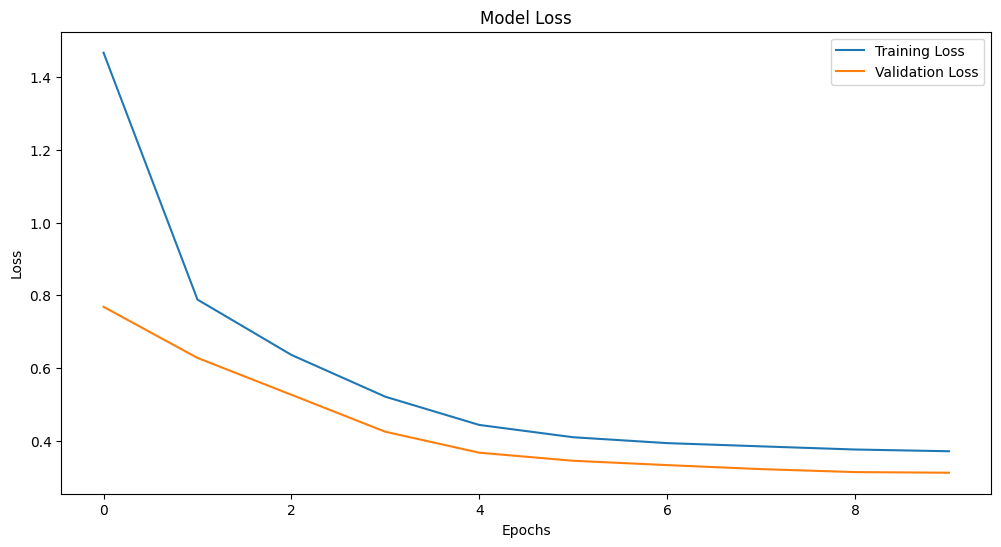

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
